# Mission One, Part l (Visualization)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# loading csv dataset as a DataFrame
df_original = pd.read_csv("210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv") 

df = df_original[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]

# visualizing categories and accident types
unique_categories = df['MONATSZAHL'].unique()
unique_accident_types = df['AUSPRAEGUNG'].unique()
fig = go.Figure(data=[go.Table(header=dict(values=['Category', 'Accident Type']),
                               cells=dict(values=[unique_categories, unique_accident_types]))]
                )
fig.show()

In [3]:
# creating list of years excluding 2021
list_of_years = df['JAHR'].unique()[1:]

### Visualization of accidents due to "Alkoholunfälle"

In [7]:
# in this code cell, we query rows based on Alkoholunfälle category for each accident type
alko_total = df.loc[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['MONAT'] == 'Summe')]
alko_verl = df.loc[(df['MONATSZAHL'] == 'Alkoholunfälle') & (df['AUSPRAEGUNG'] == 'Verletzte und Getötete') & (df['MONAT'] == 'Summe')]

# calculating unspecified type of accidents by subtracing from total value(named others) 
others = alko_total['WERT'] - alko_verl['WERT'].values

fig = go.Figure(data=[
                      go.Bar(name='Others', x=list_of_years, y=others),
                      go.Bar(name='Verletzte und Getötete', x=list_of_years, y=alko_verl['WERT'])
                      ])

fig.update_layout(barmode='stack',
                  title_text='Number of Accidents due to "Alkoholunfälle" per Accident Type 2000-2020')      
fig.show()


### Visualization of accidents due to "Verkehrsunfälle"


In [4]:
# in this code cell, we query rows based on Verkehrsunfälle category for each accident type
verk_total = df.loc[(df['MONATSZAHL'] == 'Verkehrsunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['MONAT'] == 'Summe')]
verk_verl = df.loc[(df['MONATSZAHL'] == 'Verkehrsunfälle') & (df['AUSPRAEGUNG'] == 'Verletzte und Getötete') & (df['MONAT'] == 'Summe')]
verk_mit = df.loc[(df['MONATSZAHL'] == 'Verkehrsunfälle') & (df['AUSPRAEGUNG'] == 'mit Personenschäden') & (df['MONAT'] == 'Summe')]

# calculating unspecified type of accidents by subtracing from total value(named others) 
others = verk_total['WERT'] - (verk_verl['WERT'] + verk_mit['WERT'].values).values

fig = go.Figure(data=[
                      go.Bar(name='Others', x=list_of_years, y=others),
                      go.Bar(name='Verletzte und Getötete', x=list_of_years, y=verk_verl['WERT']),
                      go.Bar(name='mit Personenschäden', x=list_of_years, y=verk_mit['WERT'])
                      ])
fig.update_layout(barmode='stack',
                  title_text='Number of Accidents due to "Verkehrsunfälle" per Accident Type 2000-2020')
fig.show()

### Visualization of accidents due to "Fluchtunfälle"


In [5]:
# in this code cell, we query rows based on Fluchtunfälle category for each accident type
fluch_total = df.loc[(df['MONATSZAHL'] == 'Fluchtunfälle') & (df['AUSPRAEGUNG'] == 'insgesamt') & (df['MONAT'] == 'Summe')]
fluch_verl = df.loc[(df['MONATSZAHL'] == 'Fluchtunfälle') & (df['AUSPRAEGUNG'] == 'Verletzte und Getötete') & (df['MONAT'] == 'Summe')]

# calculating unspecified type of accidents by subtracing from total value(named others) 
others = fluch_total['WERT'] - fluch_verl['WERT'].values

fig = go.Figure(data=[
                      go.Bar(name='Others', x=list_of_years, y=others),
                      go.Bar(name='Verletzte und Getötete', x=list_of_years, y=fluch_verl['WERT'])
                      ])
fig.update_layout(barmode='stack',
                  title_text='Number of Accidents due to "Fluchtunfälle" per Accident Type 2000-2020')
fig.show()


## Pie Chat illustrates percentage of different categories causing accident

In [9]:
fig = go.Figure(data=[go.Pie(labels=['Alkoholunfälle', 'Verkehrsunfälle', 'Fluchtunfälle'], 
                             values=[alko_total['WERT'].sum(), 
                                     verk_total['WERT'].sum(),
                                     fluch_total['WERT'].sum()],
                             hole=.4)])
fig.update_layout(            
                  title_text='Total accidents per Catergory'),
fig.show()


## Graph represents number of accidents per month from 2000 to 2020

In [10]:
# querying all the rows containing number of accidents per month from 2000 to 2020, excluding those that include Summe and are from 2021
month_data = df.loc[(df['AUSPRAEGUNG'] == 'insgesamt') & (df['MONAT'] != 'Summe') & (df['JAHR'] != 2021)][['MONAT', 'WERT']]

# since value in MONAT is a combination of year and month, we only keep month in order 
# to facilitate the use of pandas groupby to sum of the accidents per month
month_data['MONAT'] = month_data.MONAT.str[4:]
total_per_month = month_data.groupby('MONAT', as_index=False).sum()

list_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = go.Figure(data=[
                      go.Scatter(name='', x=list_months, y=total_per_month.WERT)
                     ])
fig.update_layout(title_text='Number of Accidents per month over 21 years')
fig.show()

# Mission One, Part ll (Forecasting)

## Data Preparation

According to assignment, we are required to forecast values for:
- Category: 'Alkoholunfälle'
- Type: 'insgesamt
- Year: '2021'
- Month: '01'


---

Note since we have a scarce dataset, it is not reasonable to use deep learning models such as LSTM for forecasting. Thus, we opt for statistical models like ARIMA that uses stats property of the data.


In [11]:
# loading csv dataset
df_forecast = pd.read_csv("210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv")

# query all the rows belonging to months from 2000 to 2020 respecting category and type
df_forecast = df_forecast.loc[(df_forecast['MONATSZAHL'] == 'Alkoholunfälle') & (df_forecast['AUSPRAEGUNG'] == 'insgesamt') & 
                              (df_forecast['JAHR'] != 2021) & (df_forecast['MONAT'] != 'Summe')]

# to carry out forecasting we need only "MONAT" and "WERT" columns, which contain 
# year-month and accident values respectively
df_forecast = df_forecast.filter(items=["WERT", "MONAT"], axis=1)

# in order to forecast time series we need to provide model with proper datetime format
# so, we insert '-' between year and month to make them distinguishable
# then we use pandas datetime to actually convert them to timestamps
df_forecast['MONAT'] = df_forecast['MONAT'].str[:4] + '-' + df_forecast['MONAT'].str[4:]
df_forecast['MONAT'] = pd.to_datetime(df_forecast['MONAT'])

# fore finall preparation we set 'MONAT' column as data frame index and sort it
# according to date times
df_forecast = df_forecast.set_index('MONAT')
df_forecast.sort_index(inplace=True)

# final look to ready-to-use dataset
df_forecast

,WERT
MONAT,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0
...,...
2020-08-01,46.0
2020-09-01,46.0
2020-10-01,34.0


In [12]:
# overall look to properties of dataset
df_forecast.describe()

,WERT
count,252.000000
mean,43.753968
std,18.069448
min,10.000000
25%,30.750000
50%,40.000000
75%,53.250000
max,107.000000


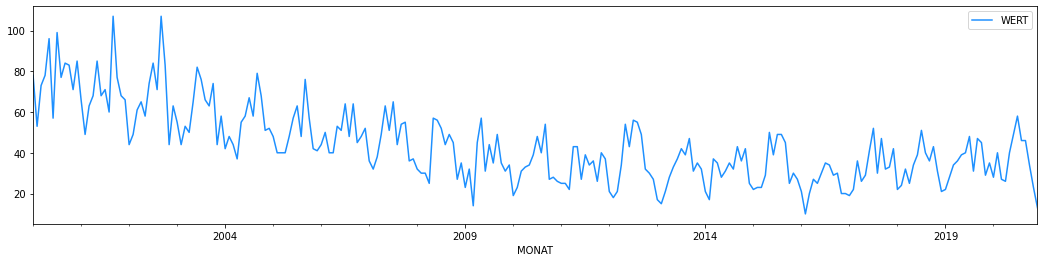

In [13]:
# visualization of number of accidents 
plt.rcParams["figure.figsize"] = (18,4)
df_forecast.plot(color='dodgerblue')
plt.show()

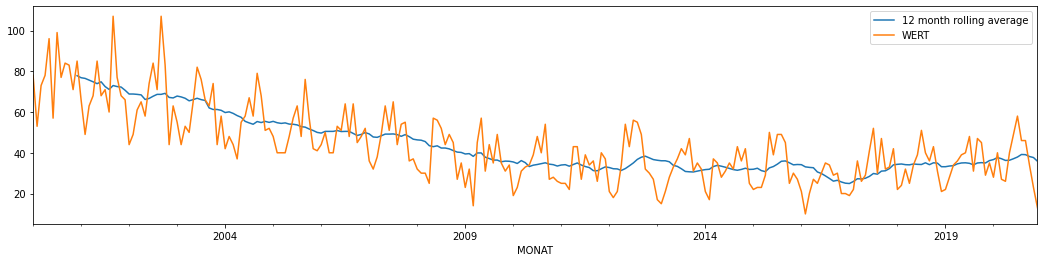

In [14]:
# visualizing 12 months mean
time_series = df_forecast['WERT']
time_series.rolling(12).mean().plot(label='12 month rolling average')
time_series.plot()
plt.legend()

- To use ARIMA model, it is important to find out that the data is not stationary, easy way is to plot seasonality. In case if there is some seasonality to data, we can deduce that it is non-stationary.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



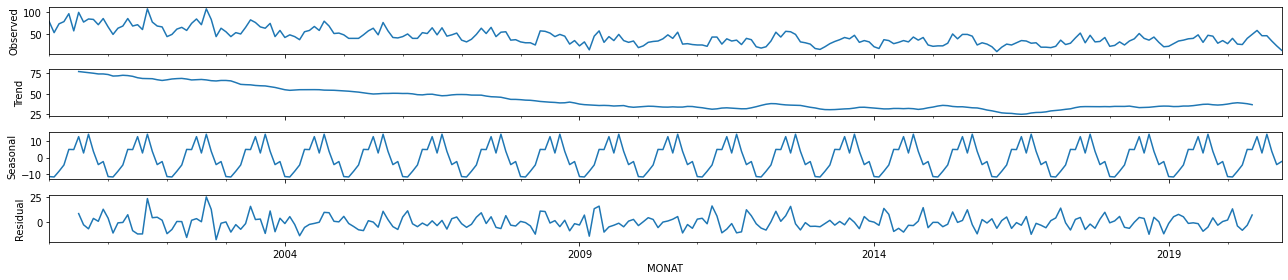

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonality = seasonal_decompose(time_series)
figure = seasonality.plot()

## Building Model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



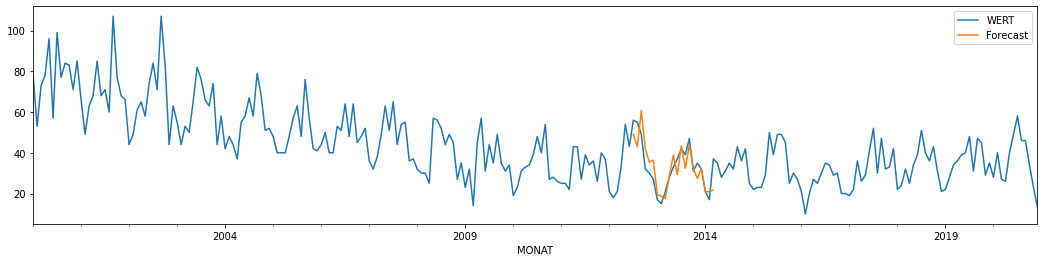

In [28]:
import statsmodels.api as sm

# creating an ARIMA model with seasonality
model = sm.tsa.statespace.SARIMAX(df_forecast['WERT'], order=(3, 1, 0), seasonal_order=(1, 1, 1, 12))

# fit model
history = model.fit()

# show forecasted values with respect to actual ones
df_forecast['Forecast'] = history.predict(start=150, end=170)
df_forecast[['WERT', 'Forecast']].plot()

# to get more information about value of parameters we can use summary() function
#history.summary()

In [19]:
# for future forecasting we need to add time datetime 
# to do so we can use pandas DateOffset to create date 
# for the next year(2021) and then concatenate them 
# with previous data frame

from pandas.tseries.offsets import DateOffset
df_forecast_future = pd.DataFrame(index=[df_forecast.index[-1] + DateOffset(months=i) for i in range(1, 13)], columns=df_forecast.columns)
df_forecast_future = pd.concat([df_forecast, df_forecast_future])


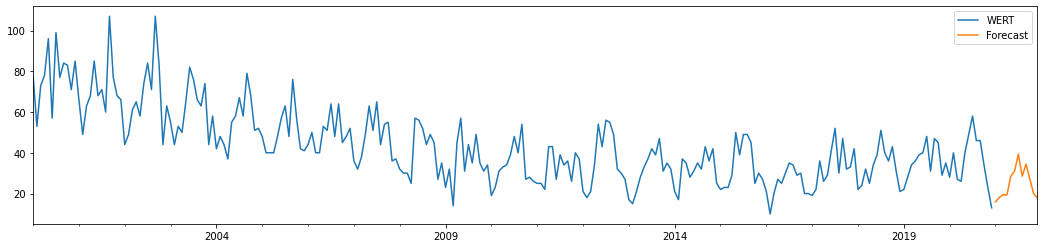

In [20]:
# forecasting values for the year 2021

df_forecast_future['Forecast'] = history.predict('2021-01-01', '2021-12-01')
df_forecast_future[['WERT', 'Forecast']].plot()

In [23]:
"""
Prediction for:
  Category: 'Alkoholunfälle'
  Type: 'insgesamt
  Year: '2021'
  Month: '01'
"""
print(int(history.predict('2021-01-01', '2021-01-01')))

15


In [21]:
# saving and loading model as a pickle file
#from statsmodels.tsa.statespace.sarimax import SARIMAXResults

#history.save("accident_model.pickle")
#loaded_model = SARIMAXResults.load("accident_model.pickle")
